In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

In [76]:
%pwd

'/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/student_submissions/projects/02-luther/kneissl_max'

In [77]:
df = pd.read_table("/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/p054.txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Y      30 non-null int64
X1     30 non-null int64
X2     30 non-null int64
X3     30 non-null int64
X4     30 non-null int64
X5     30 non-null int64
X6     30 non-null int64
dtypes: int64(7)
memory usage: 1.7 KB


In [78]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [80]:
df.columns

Index(['Y ', 'X1 ', 'X2 ', 'X3 ', 'X4 ', 'X5 ', 'X6 '], dtype='object')

In [81]:
df.columns = df.columns.map(str.strip)
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [82]:
df.shape

(30, 7)

In [83]:
# Show correlation
df.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.825418,0.426117,0.623678,0.590139,0.156439,0.155086
X1,0.825418,1.000000,0.558288,0.596736,0.669197,0.187714,0.224580
X2,0.426117,0.558288,1.000000,0.493331,0.445478,0.147233,0.343293
X3,0.623678,0.596736,0.493331,1.000000,0.640314,0.115965,0.531620
X4,0.590139,0.669197,0.445478,0.640314,1.000000,0.376883,0.574186
X5,0.156439,0.187714,0.147233,0.115965,0.376883,1.000000,0.283343
X6,0.155086,0.224580,0.343293,0.531620,0.574186,0.283343,1.000000


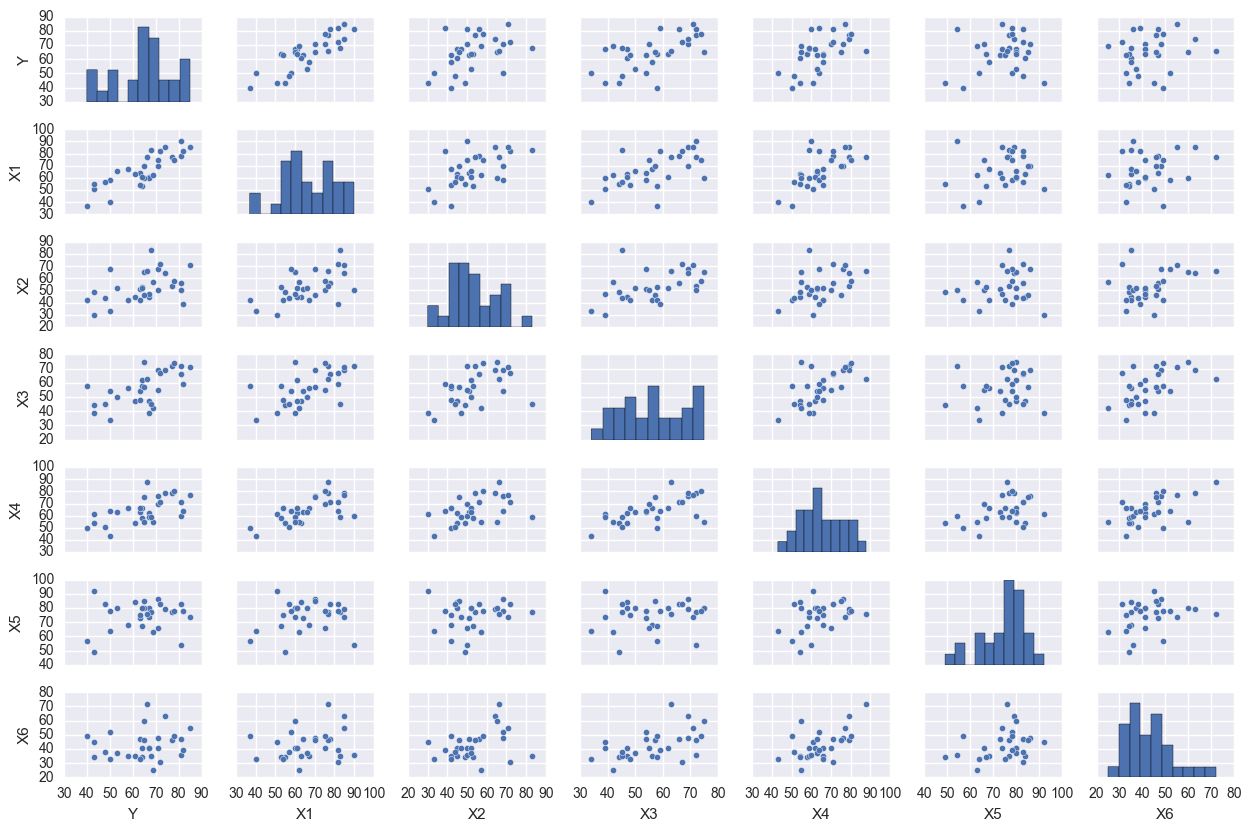

In [89]:
sns.pairplot(df, size = 1.2, aspect=1.5)

In [92]:
# I create a feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df, return_type="dataframe")
# Create model
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           1.24e-05
Time:                        15:20:18   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.362       -13.187    34.761
X1             0.6132      0.161      3.809      0.001         0.280     0.946
X2            -0.0731      0.136     -0.538      0.596        -0.354     0.208
X3             0.3203      0.169      1.901      0.070        -0.028     0.669
X4             0.0817      0.221      0.369      0.715        -0.376     0.540
X5             0.0384      0.147      0.261      0.796        -0.266     0.342
X6            -0.2171      0.178     -1.218      0.236        -0.586     0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
lm1 = smf.ols('Y ~X1 + X2 + X3 + X4 + X5 + X6', data=df)
fit1 = lm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           1.24e-05
Time:                        15:42:21   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.362       -13.187    34.761
X1             0.6132      0.161      3.809      0.001         0.280     0.946
X2            -0.0731      0.136     -0.538      0.596        -0.354     0.208
X3             0.3203      0.169      1.901      0.070        -0.028     0.669
X4             0.0817      0.221      0.369      0.715        -0.376     0.540
X5             0.0384      0.147      0.261      0.796        -0.266     0.342
X6            -0.2171      0.178     -1.218      0.236        -0.586     0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
# Define the model removing X2, X4, and X5
lm2 = smf.ols('Y ~ X1 + X3 + X6', data=df)
# Fit the model
fit2 = lm2.fit()
# Check out the results
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     22.92
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           1.81e-07
Time:                        16:02:29   Log-Likelihood:                -97.638
No. Observations:                  30   AIC:                             203.3
Df Residuals:                      26   BIC:                             208.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.5777      7.544      1.800      0.084        -1.929    29.084
X1             0.6227      0.118      5.271      0.000         0.380     0.866
X3             0.3124      0.154      2.026      0.053        -0.005     0.629
X6            -0.1870      0.145     -1.291      0.208        -0.485     0.111
==============================================================================
Omnibus:                        2.856   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                1.394
Skew:                          -0.121   Prob(JB):                        0.498
Kurtosis:                       1.972   Cond. No.                         605.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

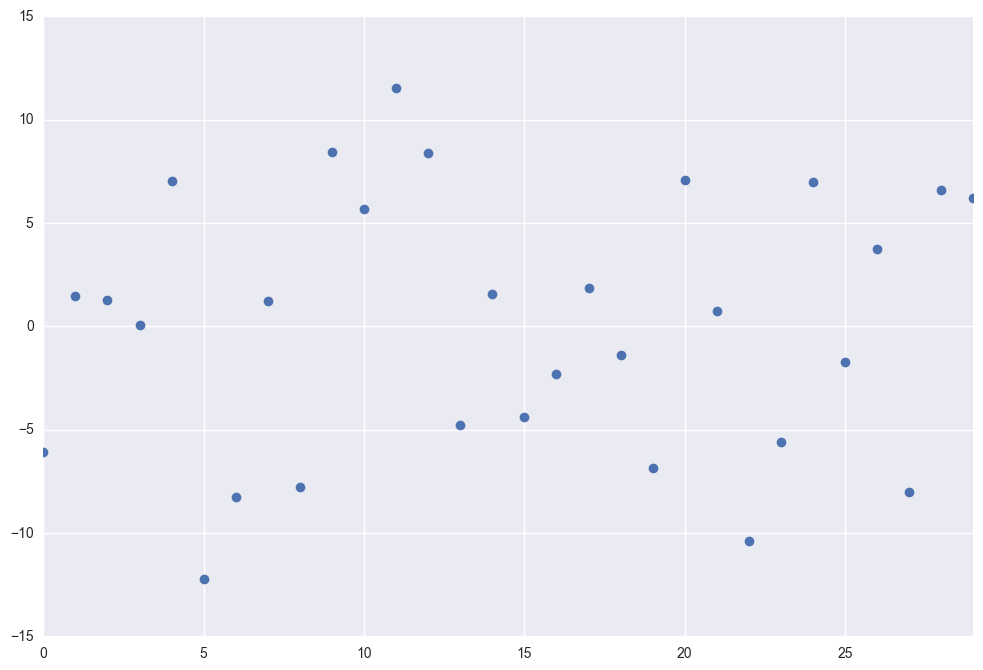

In [96]:
fit2.resid.plot(style='o', figsize=(12,8))

## Switch to scikit learn

In [100]:
lr = LinearRegression() # creates empty model
X = df.iloc[:, 1:] # choose predictor variables (all but Y)
y = df.iloc[:, 0]
lr.fit(X,y) # fit model to full dataset
lr.score(X,y) # print out R^2 for model

0.7326019925311491

In [101]:
lr1 = LinearRegression() # creates empty model
X = df[['X1', 'X3', 'X6']]
y = df['Y']
lr1.fit(X, y) # fit model to full dataset
lr1.score(X, y) # print out R^2 for model

0.72559499957450746

In [104]:
print(lr.intercept_)
lr.coef_

10.7870763857


array([ 0.61318761, -0.07305014,  0.32033212,  0.08173213,  0.03838145,
       -0.21705668])

In [106]:
# pickle stuff for later (dataframes)
df.to_pickle('/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/survey_data.pkl')

In [107]:
# picke stuff sklearn
from sklearn.externals import joblib
joblib.dump(lr, '/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/survey_sk_model.pkl')

['/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/survey_sk_model.pkl',
 '/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/survey_sk_model.pkl_01.npy',
 '/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/survey_sk_model.pkl_02.npy']

# Polynomial Regression

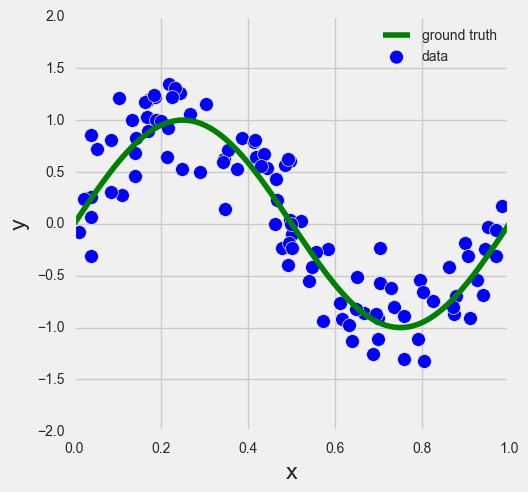

In [110]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

np.random.seed(9)

def f(x):
    return np.sin(2 * np.pi * x)

#100 evenly spaced numbers 0-1
x_plot = np.linspace(0, 1, 100)

# generate points and keep subset of them
n_samples = 100

X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis] # sin + random gaussian noise

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()

### fitting nth-degree Polynomial

In [113]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# plot result of pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

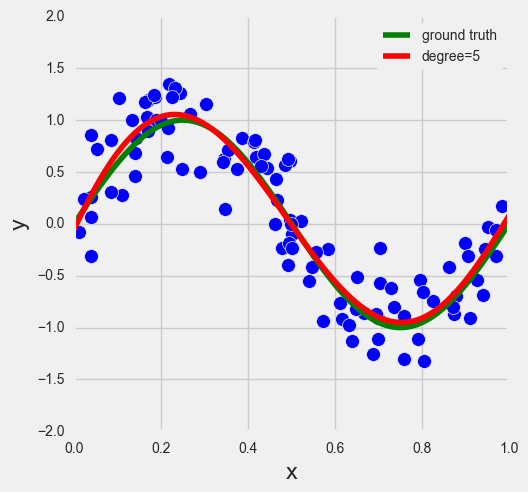

In [118]:

# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 5
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

In [119]:
# pickle for later
np.savez('/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/class_lectures/week02-luther1/03-regression_statsmodels/data/poly_data.npz', X, y)

In [132]:
    import pickle


with open('/Users/maxkneissl/Repositories/Metis_Course/nyc17_ds10/student_submissions/projects/02-luther/kneissl_max/movies_2016_df.pkl', 'rb') as picklefile: 
    new_df_mov = pickle.load(picklefile)

In [134]:
len(new_df_mov)

405

In [138]:
writer = pd.ExcelWriter('movies_2016_df.xlsx')
new_df_mov.to_excel(writer,'Sheet1')

In [139]:
writer.save()